**Import libraries**

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import Data**

In [2]:
my_filepath = 'train.csv'
df = pd.read_csv(my_filepath, index_col='PassengerId')

# Context

Используемый набор данных является сгенерированным синтетически и основывается на реальных данных о пассажирах Титаника со схожими статистическими свойствами.

«Тита́ник» (англ. Titanic) — британский трансатлантический пароход, второй лайнер класса «Олимпик» компании «White Star Line». Крупнейшее пассажирское судно в мировой истории в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года.

10 апреля 1912 года «Титаник» отправился из **Саутгемптона** (**S**outhampton) в Нью-Йорк, в свой первый и единственный рейс. Совершив остановки во французском **Шербуре** (**C**herbourg) и ирландском **Квинстауне** (**Q**ueenstown), лайнер вышел в Атлантический океан.

Каюты **первого** класса распологались на верхних палубах, **второго** класса - посередине, а **третьего** - на самых нижних палубах.

# Data quality assessment

### **1.** Let’s take a look at our dataset 

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [4]:
a, b = df.shape
print('Приведенная таблица имеет размер:', a, 'строк и', b, 'колонок, колонка PassengerId использована в качестве индекса')

Приведенная таблица имеет размер: 100000 строк и 11 колонок, колонка PassengerId использована в качестве индекса


### **2.** Проверим недостающие значения и типы наших данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


В данных имеются пропущенные начения

В таблице имеются следующие типы данных: float64(2), int64(4), object(5)

### **3.** Узнаем колличество пропущенных значений в данных.

In [6]:
df.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [7]:
print((df.isna().sum().sum() / 11000).round(3),'% - процентов всех данных пропущено')

6.924 % - процентов всех данных пропущено


<AxesSubplot:>

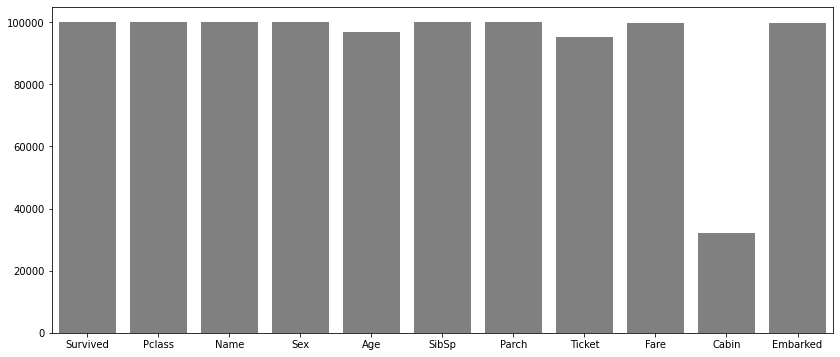

In [18]:
new_df = df
new_df = new_df.notnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(y=new_df.values, x=new_df.index, color='gray', )

Пропуски меются в стобцах Age, Ticket, Fare, Cabin, Embarked. Данных из столбца **Cabin** имеется только треть

### **4.** Проверка на дубликаты

In [9]:
df.duplicated().sum()

0

### **5.** Проверка соответсвия колонок нужным типам.

In [10]:
df['Ticket'].value_counts().head(10)

A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
W./C.           53
A/5.            40
W.E.P.          23
CA              22
STON/O2.        21
Name: Ticket, dtype: int64

In [11]:
df[df['Name'].str.match(r'(\d+)')==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [12]:
df.groupby('Embarked').count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,
C,22187,22187,22187,22187,21456,22187,22187,21949,22154,12979
Q,5424,5424,5424,5424,5237,5424,5424,5369,5416,4022
S,72139,72139,72139,72139,69767,72139,72139,67818,72047,15045


In [13]:
df.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,43886,43886,43886,42501,43886,43886,41246,43827,18156,43755
male,56114,56114,56114,54207,56114,56114,54131,56039,13978,55995


In [14]:
df.groupby('Pclass').count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,30315,30315,30315,29353,30315,30315,30288,30275,26463,30229
2,28679,28679,28679,27731,28679,28679,27855,28637,3520,28609
3,41006,41006,41006,39624,41006,41006,37234,40954,2151,40912


Данных в колонке **Cabin** присутствует лишь треть. Категориальные признаки Survived, Pclass, Sex, Embarked представленны без мусора, но с небольшими пропусками. Признак **Ticket** кроме нулевых значений имеет дубликаты, не соответствуюие классу признака - предпологается, что все билеты должны быть уникальны.

### 6. Проверка на выбросы

In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


<AxesSubplot:>

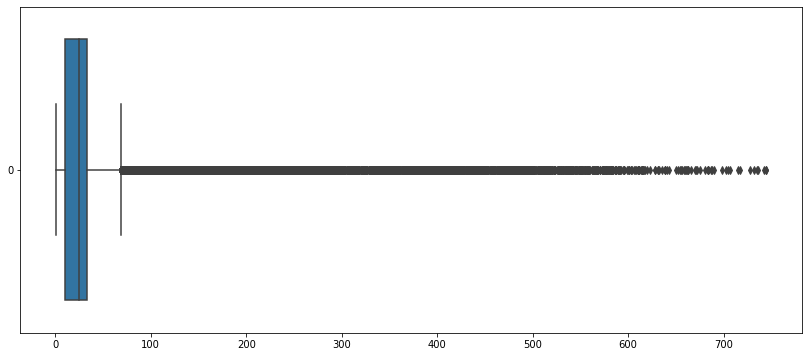

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(orient='h', data=df.Fare)

Значения **Fare** возможно имеют выбросы, так как 75 процентиль для него равняется 33.5, а max значение - 744.66.
Однако, это можно связать с тем, что цена может быть связана с благосостоянием человека, а следовательно и более дорогие каюты могло себе позволить меньшенство.

<AxesSubplot:>

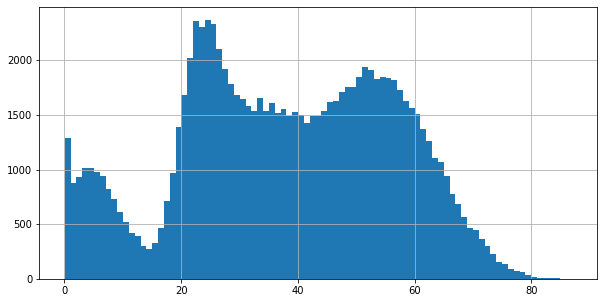

In [46]:
df.Age.hist(bins=87, figsize=(10, 5))

# Data exploration

### 1. Exploration of each individual variable

In [61]:
for col in df.columns:
    print(f'Column name: {col}','\n', df[f'{col}'].describe(), '\n\nUnique values:', df[f'{col}'].unique(), '\n\n')

Column name: Survived 
 count    100000.000000
mean          0.427740
std           0.494753
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Survived, dtype: float64 

Unique values: [1 0] 


Column name: Pclass 
 count    100000.000000
mean          2.106910
std           0.837727
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Pclass, dtype: float64 

Unique values: [1 3 2] 


Column name: Name 
 count            100000
unique            92144
top       Johnson, John
freq                 31
Name: Name, dtype: object 

Unique values: ['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler'] 


Column name: Sex 
 count     100000
unique         2
top         male
freq       56114
Name: Sex, dtype: object 

Unique values: ['male' 'female'] 


Column name: Age 
 count    96708.000000
mean  

### 2. Assessment of the relationship between each variable and the target variable

#### Relationship between Survived and Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

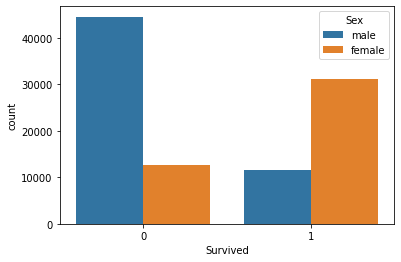

In [73]:
sns.countplot(x='Survived', hue='Sex', data=df)

#### Relationship between Survived and Age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

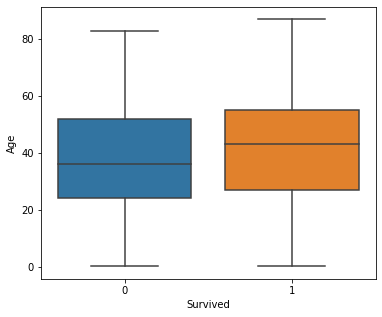

In [76]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Survived', y='Age')

#### Разделим колонку Age на 3 категории: Child - до 16 лет, Adult - 16 <= Adult < 45, и Old - старше 45

In [36]:
df['Age_group'] = df['Age']

<AxesSubplot:xlabel='Age_group', ylabel='count'>

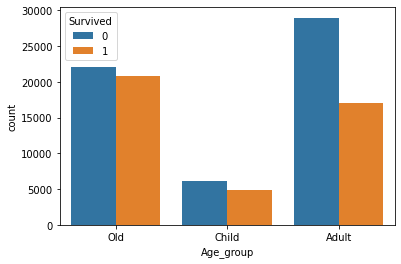

In [49]:
def age_group(x):
    if x < 16:
        return 'Child'
    elif x < 45:
        return 'Adult'
    else: return 'Old'
df.Age_group.apply(lambda x: age_group(x))
sns.countplot(hue='Survived', x=df.Age_group.apply(lambda x: age_group(x)), data=df)

**Вывод:** Если ты взрослый, то выжить шансов практически в два раза меньше чем у детей или людей старшего поколения.

#### Relationship between Survived and Pclass

#### Relationship between Survived and SibSp

#### Relationship between Survived and Parch

#### Relationship between Survived and Fare

#### Relationship between Survived and Embarked

# Summary